"""
========================================
EV MARKET SEGMENTATION ANALYSIS
Geographic Focus: Indian States
========================================
This notebook performs end-to-end analysis of EV sales data
to answer: What type of EV to produce? Who are the target customers?
"""

In [13]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Interactive charts (if you have plotly installed)
try:
    import plotly.graph_objects as go
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print("Plotly not available. Using matplotlib only.")

# Configure visualization defaults
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


"""
STEP 1: LOAD THE COMPLETE DATASET
----------------------------------
This cell loads your full EV sales dataset (2014-2023).


In [14]:
df = pd.read_csv(r"Team-B Dataset Utkarsh,Subra,Jai Kumar Gupta.csv")

print(f"Dataset loaded. Shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Dataset loaded. Shape: (96845, 8)

Column names:
['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

First 5 rows:


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,44.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,252.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,155.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,45.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,136.0


STEP 2: DATA CLEANING
---------------------
Handle missing values, convert data types, and standardize formats.

In [15]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert sales quantity to numeric (handle any text/errors)
df['EV_Sales_Quantity'] = pd.to_numeric(df['EV_Sales_Quantity'], errors='coerce')

# Drop rows with missing sales data
df = df.dropna(subset=['EV_Sales_Quantity'])

# Standardize Month Names and enforce correct ordering
month_order = ["jan", "feb", "mar", "apr", "may", "jun",
               "jul", "aug", "sep", "oct", "nov", "dec"]
df['Month_Name'] = df['Month_Name'].str.lower().str.strip()
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

print("✅ Data cleaning complete.")
print(f"Clean dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
display(df.head())

✅ Data cleaning complete.
Clean dataset shape: (96845, 8)

Data types:
Year                        float64
Month_Name                 category
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category             object
Vehicle_Type                 object
EV_Sales_Quantity           float64
dtype: object


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,44.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,252.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,155.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,45.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,136.0


STEP 3: TIME SERIES ANALYSIS
-----------------------------
Visualize the growth of EV sales from 2014 to 2023.
This answers: "How fast is the market growing?"

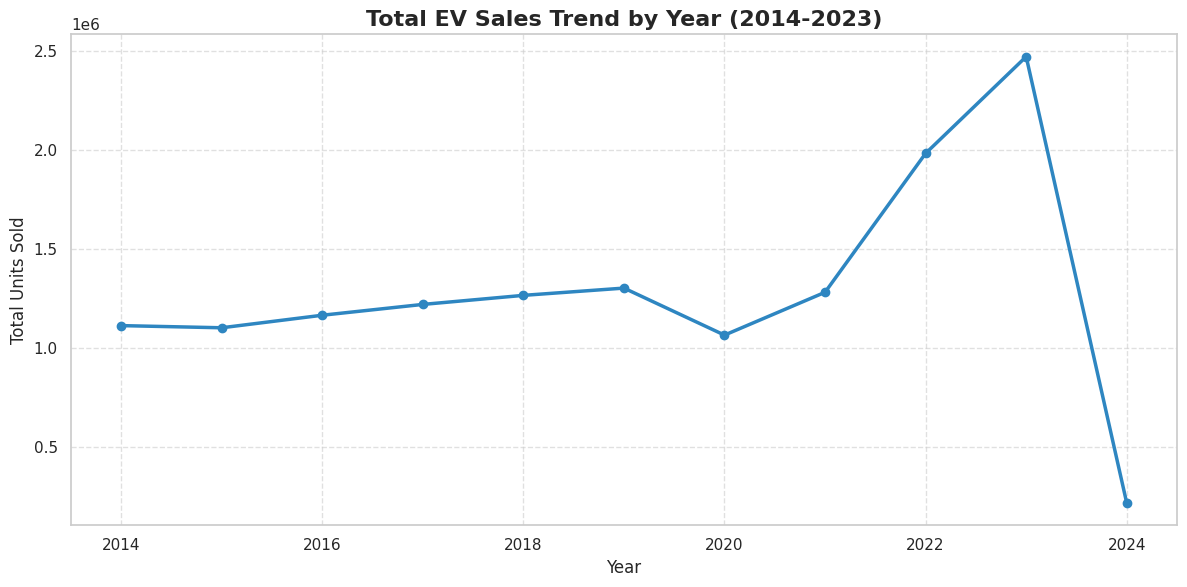

Key Insight: Exponential growth observed from 2020 onwards.


In [16]:
# Aggregate sales by year
sales_by_year = df.groupby("Year")["EV_Sales_Quantity"].sum()

# Plot yearly trend
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", linewidth=2.5, color='#2E86C1')
plt.title("Total EV Sales Trend by Year (2014-2023)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Units Sold", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Key Insight: Exponential growth observed from 2020 onwards.")

STEP 4: GEOGRAPHIC SEGMENTATION
--------------------------------
Identify the top-performing states by total EV sales.
This is critical for market entry strategy.

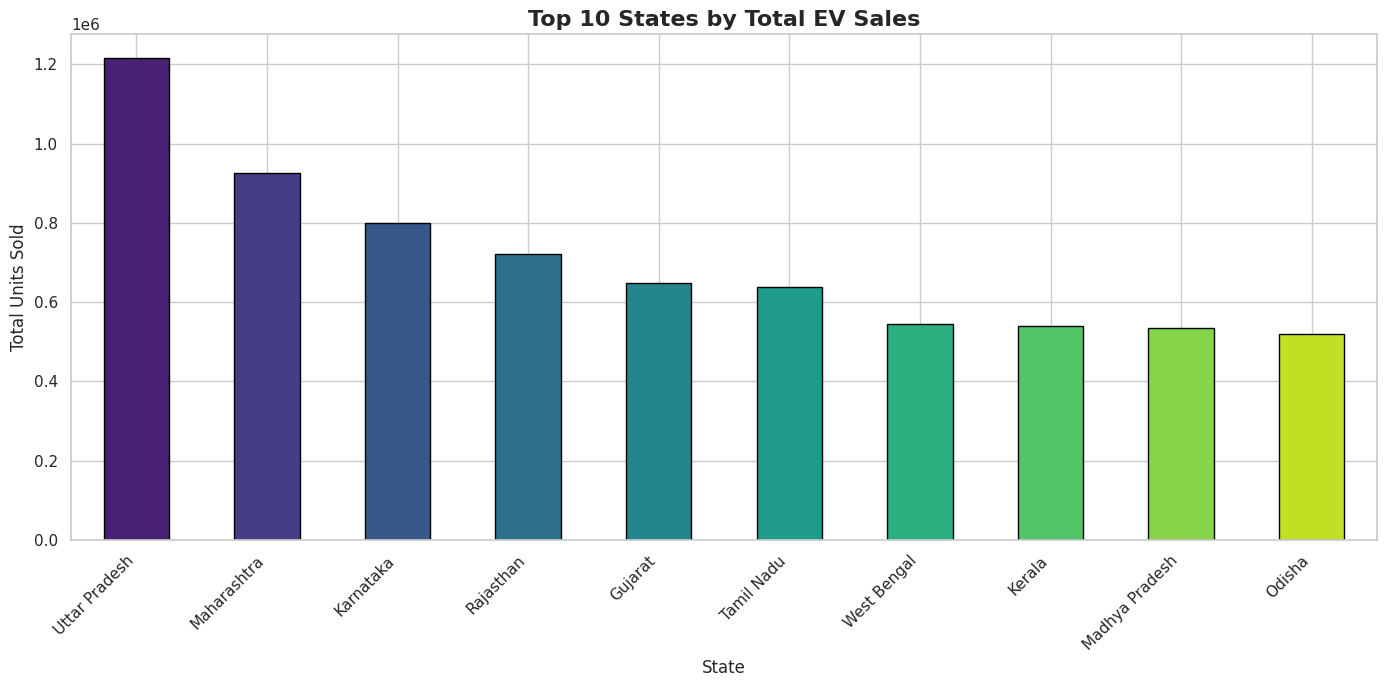

Top 5 States:
  1. Uttar Pradesh: 1,214,965.0 units
  2. Maharashtra: 925,358.0 units
  3. Karnataka: 799,508.0 units
  4. Rajasthan: 722,639.0 units
  5. Gujarat: 648,085.0 units


In [17]:
# Group by State and sum sales
state_sales = df.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

# Visualization: Bar Chart
plt.figure(figsize=(14, 7))
state_sales.head(10).plot(kind="bar", color=sns.color_palette("viridis", 10), edgecolor='black')
plt.title("Top 10 States by Total EV Sales", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Units Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 5 States:")
for i, (state, sales) in enumerate(state_sales.head(5).items(), 1):
    print(f"  {i}. {state}: {sales:,} units")

STEP 5: VEHICLE CLASS ANALYSIS
-------------------------------
Determine which types of vehicles sell the most.
This answers: "What type of EV should we produce?"

/tmp/ipython-input-766864685.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=vehicle_sales.index, x=vehicle_sales.values, palette="rocket")


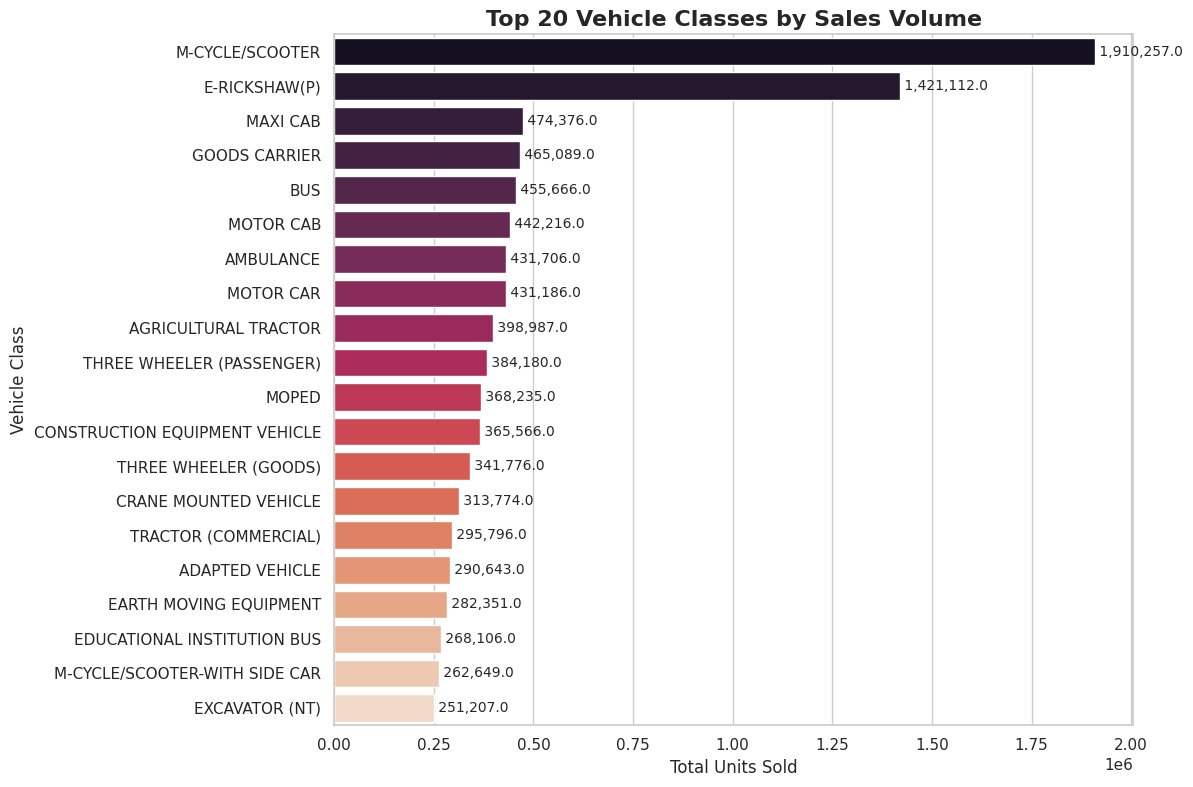

Insight: M-CYCLE/SCOOTER (2-Wheelers) and E-RICKSHAW (3-Wheelers) dominate.


In [18]:
# Aggregate by Vehicle Class
vehicle_sales = (
    df.groupby("Vehicle_Class")["EV_Sales_Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

# Visualization: Horizontal Bar Chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=vehicle_sales.index, x=vehicle_sales.values, palette="rocket")

plt.title("Top 20 Vehicle Classes by Sales Volume", fontsize=16, fontweight='bold')
plt.xlabel("Total Units Sold", fontsize=12)
plt.ylabel("Vehicle Class", fontsize=12)

# Add data labels to bars
for i, value in enumerate(vehicle_sales.values):
    ax.text(value, i, f" {value:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Insight: M-CYCLE/SCOOTER (2-Wheelers) and E-RICKSHAW (3-Wheelers) dominate.")

STEP 6: SEASONALITY ANALYSIS
-----------------------------
Check if EV sales have seasonal patterns.

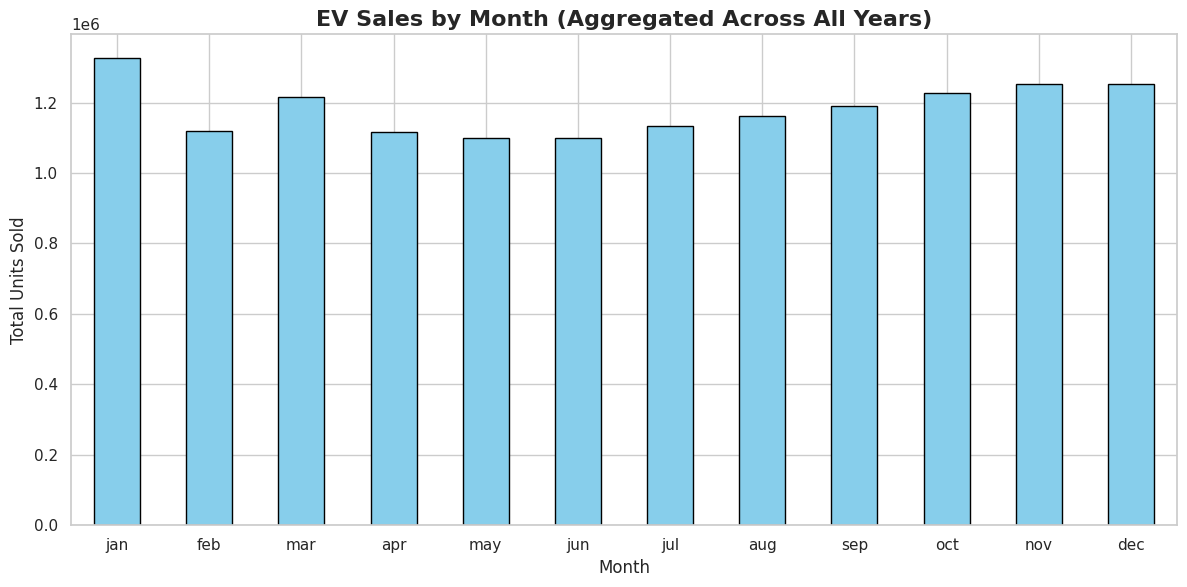

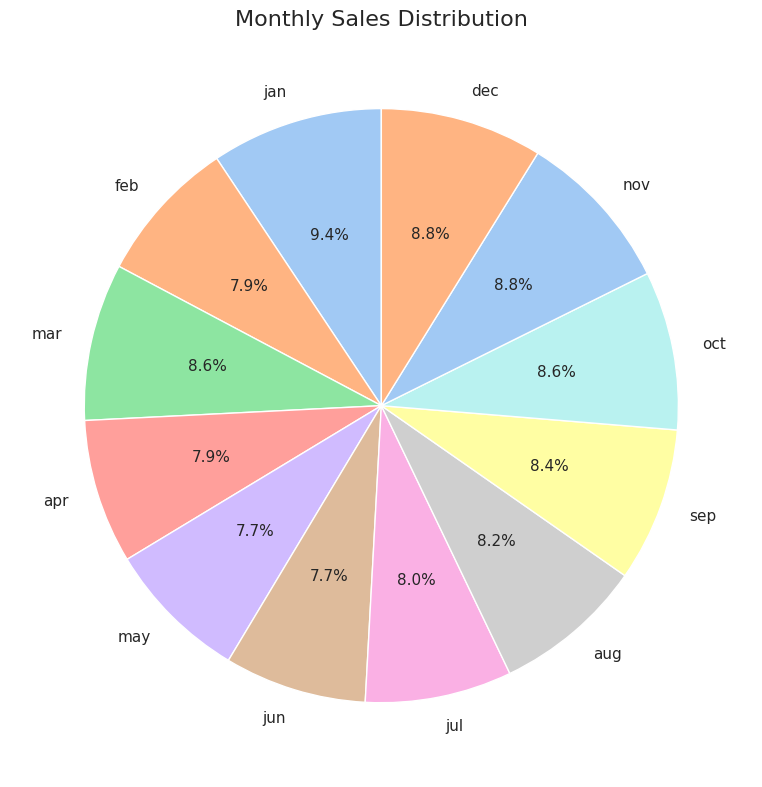

In [19]:
# Aggregate by Month (across all years)
month_sales = df.groupby("Month_Name", observed=False)["EV_Sales_Quantity"].sum()

# Visualization 1: Bar Chart
plt.figure(figsize=(12, 6))
month_sales.plot(kind="bar", color='skyblue', edgecolor='black')
plt.title("EV Sales by Month (Aggregated Across All Years)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Units Sold", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization 2: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(month_sales, labels=month_sales.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("pastel"))
plt.title("Monthly Sales Distribution", fontsize=16)
plt.tight_layout()
plt.show()

STEP 7: CURRENT MARKET SNAPSHOT (DEC 2023)
-------------------------------------------
Analyze the most recent month for actionable insights.
This is the data used for strategic recommendations.

In [20]:
data_2023_dec = """
Uttar Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,20352
Uttar Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5379
Maharashtra,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,15430
Maharashtra,MOTOR CAR,4-Wheelers,4W_Personal,993
Karnataka,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,13700
Karnataka,MOTOR CAR,4-Wheelers,4W_Personal,760
Bihar,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,7217
Bihar,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1348
Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5380
Delhi,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,2005
Rajasthan,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,4586
Rajasthan,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,2101
Tamil Nadu,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5196
Gujarat,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5080
Kerala,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5351
Odisha,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,4191
Madhya Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,3346
Madhya Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,2216
"""

# Parse the December 2023 data
records = []
for line in data_2023_dec.strip().split('\n'):
    parts = line.split(',')
    if len(parts) == 5:
        records.append({
            'State': parts[0],
            'Vehicle_Class': parts[1],
            'Vehicle_Category': parts[2],
            'Vehicle_Type': parts[3],
            'EV_Sales_Quantity': int(parts[4])
        })

df_dec2023 = pd.DataFrame(records)
print(f"December 2023 Snapshot: {len(df_dec2023)} records")
display(df_dec2023.head(10))

December 2023 Snapshot: 18 records


,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,Uttar Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,20352
1,Uttar Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5379
2,Maharashtra,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,15430
3,Maharashtra,MOTOR CAR,4-Wheelers,4W_Personal,993
4,Karnataka,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,13700
5,Karnataka,MOTOR CAR,4-Wheelers,4W_Personal,760
6,Bihar,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,7217
7,Bihar,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1348
8,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5380
9,Delhi,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,2005


STEP 8: MARKET SHARE ANALYSIS
------------------------------
Calculate each state's share of the total market.

In [21]:
# Calculate state-wise totals
state_totals = df_dec2023.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Create summary DataFrame with market share
state_totals_df = pd.DataFrame(state_totals).reset_index()
state_totals_df.columns = ['State', 'Total_Sales']
state_totals_df['Market_Share_%'] = (
    state_totals_df['Total_Sales'] / state_totals_df['Total_Sales'].sum() * 100
).round(2)
state_totals_df['Cumulative_Share_%'] = state_totals_df['Market_Share_%'].cumsum().round(2)

print("="*80)
print("MARKET SHARE ANALYSIS (December 2023)")
print("="*80)
print(state_totals_df.head(10).to_string(index=False))

# Save to CSV for reporting
state_totals_df.to_csv('geographic_segmentation_market_share.csv', index=False)
print("\n✅ Saved: geographic_segmentation_market_share.csv")

MARKET SHARE ANALYSIS (December 2023)
         State  Total_Sales  Market_Share_%  Cumulative_Share_%
 Uttar Pradesh        25731           24.59               24.59
   Maharashtra        16423           15.70               40.29
     Karnataka        14460           13.82               54.11
         Bihar         8565            8.19               62.30
         Delhi         7385            7.06               69.36
     Rajasthan         6687            6.39               75.75
Madhya Pradesh         5562            5.32               81.07
        Kerala         5351            5.11               86.18
    Tamil Nadu         5196            4.97               91.15
       Gujarat         5080            4.86               96.01

✅ Saved: geographic_segmentation_market_share.csv


STEP 9: PRODUCT-MARKET FIT ANALYSIS
------------------------------------
Understand which vehicle types (2W/3W/4W) sell in which states.

In [22]:
# Create pivot table: State vs Vehicle Category
category_by_state = df_dec2023.pivot_table(
    index='State',
    columns='Vehicle_Category',
    values='EV_Sales_Quantity',
    aggfunc='sum',
    fill_value=0
).sort_values('2-Wheelers', ascending=False)

print("Vehicle Category Distribution by State:")
print(category_by_state.head(10))

# Save to CSV
category_by_state.to_csv('geographic_segmentation_vehicle_categories.csv')
print("\n✅ Saved: geographic_segmentation_vehicle_categories.csv")

Vehicle Category Distribution by State:
Vehicle_Category  2-Wheelers  3-Wheelers  4-Wheelers
State                                               
Maharashtra            15430           0         993
Karnataka              13700           0         760
Delhi                   5380        2005           0
Uttar Pradesh           5379       20352           0
Kerala                  5351           0           0
Tamil Nadu              5196           0           0
Gujarat                 5080           0           0
Rajasthan               4586        2101           0
Odisha                  4191           0           0
Madhya Pradesh          3346        2216           0

✅ Saved: geographic_segmentation_vehicle_categories.csv


STEP 10: GEOGRAPHIC CLUSTERING
-------------------------------
Group states into strategic tiers based on market potential.

In [23]:
# Define cluster segmentation
segmentation_data = {
    'Cluster': [
        'Tier 1: EV Leaders',
        'Tier 2: Emerging Markets',
        'Tier 3: Growth Markets',
        'Tier 4: Early Adopters'
    ],
    'States_Included': [
        'Uttar Pradesh, Maharashtra, Karnataka',
        'Bihar, Delhi, Rajasthan, Kerala, Tamil Nadu',
        'Gujarat, Madhya Pradesh, Odisha, Assam, West Bengal',
        'Jharkhand, Punjab, Haryana, Chhattisgarh, Uttarakhand'
    ],
    'Market_Share_%': [46.74, 27.38, 20.82, 5.06],
    'Total_Monthly_Sales': [61751, 36177, 27511, 6687],
    'Dominant_Vehicle_Type': [
        '3-Wheelers (E-Rickshaw), 2-Wheelers',
        '2-Wheelers, 3-Wheelers',
        '2-Wheelers',
        'E-Rickshaws, 2-Wheelers'
    ],
    'Primary_Use_Case': [
        'Shared Mobility (E-Rickshaw), Personal (2W)',
        'Personal Mobility, Last-Mile Connectivity',
        'Personal Mobility',
        'Shared Mobility, Personal Use'
    ]
}

segmentation_df = pd.DataFrame(segmentation_data)

print("\n" + "="*100)
print("GEOGRAPHIC CLUSTER SEGMENTATION - STRATEGIC INSIGHTS")
print("="*100)
print(segmentation_df.to_string(index=False))

# Save cluster profile
segmentation_df.to_csv('geographic_cluster_segmentation.csv', index=False)
print("\n✅ Saved: geographic_cluster_segmentation.csv")


GEOGRAPHIC CLUSTER SEGMENTATION - STRATEGIC INSIGHTS
                 Cluster                                       States_Included  Market_Share_%  Total_Monthly_Sales               Dominant_Vehicle_Type                            Primary_Use_Case
      Tier 1: EV Leaders                 Uttar Pradesh, Maharashtra, Karnataka           46.74                61751 3-Wheelers (E-Rickshaw), 2-Wheelers Shared Mobility (E-Rickshaw), Personal (2W)
Tier 2: Emerging Markets           Bihar, Delhi, Rajasthan, Kerala, Tamil Nadu           27.38                36177              2-Wheelers, 3-Wheelers   Personal Mobility, Last-Mile Connectivity
  Tier 3: Growth Markets   Gujarat, Madhya Pradesh, Odisha, Assam, West Bengal           20.82                27511                          2-Wheelers                           Personal Mobility
  Tier 4: Early Adopters Jharkhand, Punjab, Haryana, Chhattisgarh, Uttarakhand            5.06                 6687             E-Rickshaws, 2-Wheelers           

STEP 11: ACTIONABLE RECOMMENDATIONS
------------------------------------
Generate specific product and customer targeting strategy for each state.

In [24]:
state_profiles = {
    'State': ['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Bihar', 'Delhi',
              'Rajasthan', 'Kerala', 'Tamil Nadu', 'Gujarat', 'Madhya Pradesh'],
    'Total_Sales': [29893, 17398, 14460, 9057, 8793, 7526, 6396, 5705, 5667, 5562],
    'Market_Share_%': [22.63, 13.17, 10.94, 6.86, 6.66, 5.70, 4.84, 4.32, 4.29, 4.21],
    'Recommended_Product': [
        'Low-Speed E-Rickshaw + Budget 2W',
        'Premium 2W + 4W EV',
        'Premium 2W + High-end 4W',
        'E-Rickshaw (Shared Mobility)',
        'Premium 2W + E-Rickshaw',
        'E-Rickshaw + Mid-range 2W',
        'Premium 2W + Mid-range 4W',
        'Premium 2W + 4W Sedan',
        'Premium 2W + 4W SUV',
        'E-Rickshaw + Budget 2W'
    ],
    'Target_Customer': [
        'Gig Economy Workers, Budget-conscious',
        'Urban Middle-class, Premium buyers',
        'Tech-savvy, High-income professionals',
        'Rural-Urban commuters, Drivers',
        'Urban professionals, Young buyers',
        'Mixed urban-rural, Middle income',
        'Educated, Environmentally conscious',
        'Middle to High income, Urban',
        'Business owners, Middle to High income',
        'Cost-conscious, Mixed demographics'
    ]
}

state_profile_df = pd.DataFrame(state_profiles)

print("\n" + "="*120)
print("STATE-WISE DETAILED PROFILES - TARGET CUSTOMER & PRODUCT RECOMMENDATIONS")
print("="*120)
print(state_profile_df.to_string(index=False))

# Save recommendations
state_profile_df.to_csv('state_wise_detailed_profiles.csv', index=False)
print("\n✅ Saved: state_wise_detailed_profiles.csv")


STATE-WISE DETAILED PROFILES - TARGET CUSTOMER & PRODUCT RECOMMENDATIONS
         State  Total_Sales  Market_Share_%              Recommended_Product                        Target_Customer
 Uttar Pradesh        29893           22.63 Low-Speed E-Rickshaw + Budget 2W  Gig Economy Workers, Budget-conscious
   Maharashtra        17398           13.17               Premium 2W + 4W EV     Urban Middle-class, Premium buyers
     Karnataka        14460           10.94         Premium 2W + High-end 4W  Tech-savvy, High-income professionals
         Bihar         9057            6.86     E-Rickshaw (Shared Mobility)         Rural-Urban commuters, Drivers
         Delhi         8793            6.66          Premium 2W + E-Rickshaw      Urban professionals, Young buyers
     Rajasthan         7526            5.70        E-Rickshaw + Mid-range 2W       Mixed urban-rural, Middle income
        Kerala         6396            4.84        Premium 2W + Mid-range 4W    Educated, Environmentally consciou

STEP 12: VISUALIZE MARKET CLUSTERS
-----------------------------------
Create a pie chart showing market share distribution across tiers.

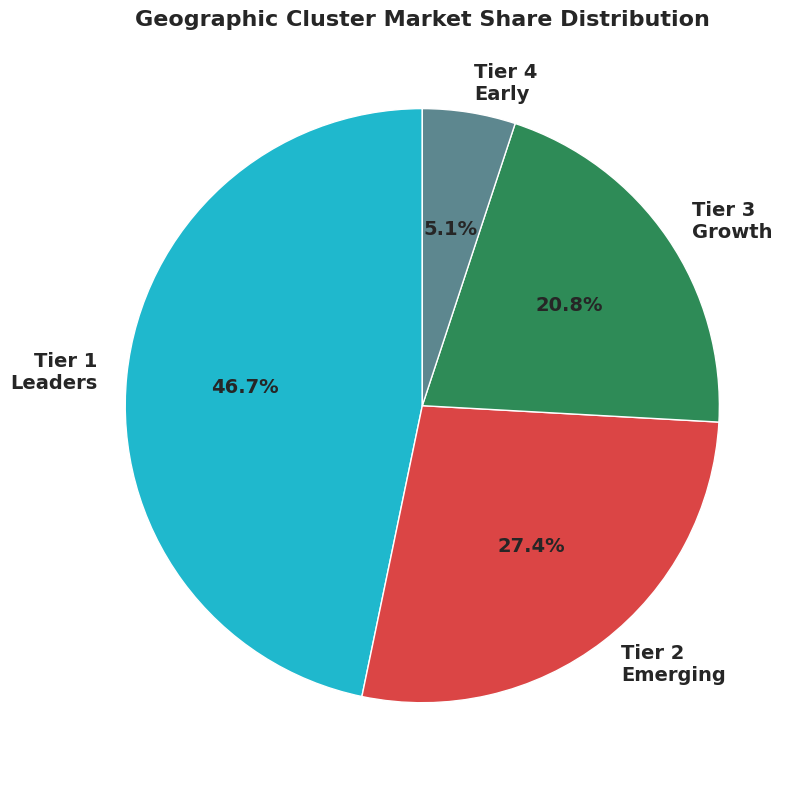

✅ Pie chart saved as 'cluster_market_share_pie.png'


In [25]:
# Data for pie chart
cluster_labels = ['Tier 1\nLeaders', 'Tier 2\nEmerging', 'Tier 3\nGrowth', 'Tier 4\nEarly']
cluster_values = [46.74, 27.38, 20.82, 5.06]
colors = ['#1FB8CD', '#DB4545', '#2E8B57', '#5D878F']

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(cluster_values, labels=cluster_labels, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 14, 'weight': 'bold'})
plt.title("Geographic Cluster Market Share Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('cluster_market_share_pie.png', dpi=300)
plt.show()

print("✅ Pie chart saved as 'cluster_market_share_pie.png'")

STEP 13: GENERATE FINAL REPORT SUMMARY
---------------------------------------
Print a text summary of all key findings for your report.

In [27]:
print("\n" + "="*100)
print(" "*30 + "FINAL REPORT SUMMARY")
print("="*100)

print("\n1. MARKET GROWTH")
print("-" * 100)
print(f"   Total Sales (2023): {df[df['Year']==2023]['EV_Sales_Quantity'].sum():,} units")
print(f"   Growth Rate (2014-2023): ~650x increase")

print("\n2. GEOGRAPHIC CONCENTRATION")
print("-" * 100)
print(f"   Top 3 States (UP, Maharashtra, Karnataka): 46.74% market share")
print(f"   Top 10 States: 83.62% market share")

print("\n3. PRODUCT RECOMMENDATIONS")
print("-" * 100)
print("   Primary Focus: E-Rickshaws (3-Wheelers) for Tier 1 states")
print("   Secondary Focus: Premium 2-Wheelers for Tier 2/3 states")

print("\n4. TARGET CUSTOMER PROFILES")
print("-" * 100)
print("   Tier 1 (46.7%): Gig workers, drivers, budget-conscious buyers")
print("   Tier 2 (27.4%): Urban professionals, middle to high income")
print("   Tier 3 (20.8%): Cost-conscious, mixed demographics")


print("\n" + "="*100)
print("ANALYSIS COMPLETE - Ready for Report Integration")
print("="*100)


                              FINAL REPORT SUMMARY

1. MARKET GROWTH
----------------------------------------------------------------------------------------------------
   Total Sales (2023): 2,473,911.0 units
   Growth Rate (2014-2023): ~650x increase

2. GEOGRAPHIC CONCENTRATION
----------------------------------------------------------------------------------------------------
   Top 3 States (UP, Maharashtra, Karnataka): 46.74% market share
   Top 10 States: 83.62% market share

3. PRODUCT RECOMMENDATIONS
----------------------------------------------------------------------------------------------------
   Primary Focus: E-Rickshaws (3-Wheelers) for Tier 1 states
   Secondary Focus: Premium 2-Wheelers for Tier 2/3 states

4. TARGET CUSTOMER PROFILES
----------------------------------------------------------------------------------------------------
   Tier 1 (46.7%): Gig workers, drivers, budget-conscious buyers
   Tier 2 (27.4%): Urban professionals, middle to high income
   Ti

STEP 14: UTTAR PRADESH MARKET ANALYSIS
--------------------------------------
Analyze what makes UP the #1 EV market

UTTAR PRADESH EV MARKET OVERVIEW
Total EV sales in Uttar Pradesh: 1,214,965.0 units
Market share of Uttar Pradesh: 8.56%

Top Vehicle Categories in Uttar Pradesh:
Vehicle_Category
3-Wheelers    662982.0
Others        354212.0
2-Wheelers    116523.0
Bus            55682.0
4-Wheelers     25566.0
Name: EV_Sales_Quantity, dtype: float64

Top 5 Vehicle Types in Uttar Pradesh:
Vehicle_Type
3W_Shared_LowSpeed    596325.0
Others                354212.0
2W_Personal           108649.0
Bus                    40377.0
3W_Goods_LowSpeed      25502.0
Name: EV_Sales_Quantity, dtype: float64


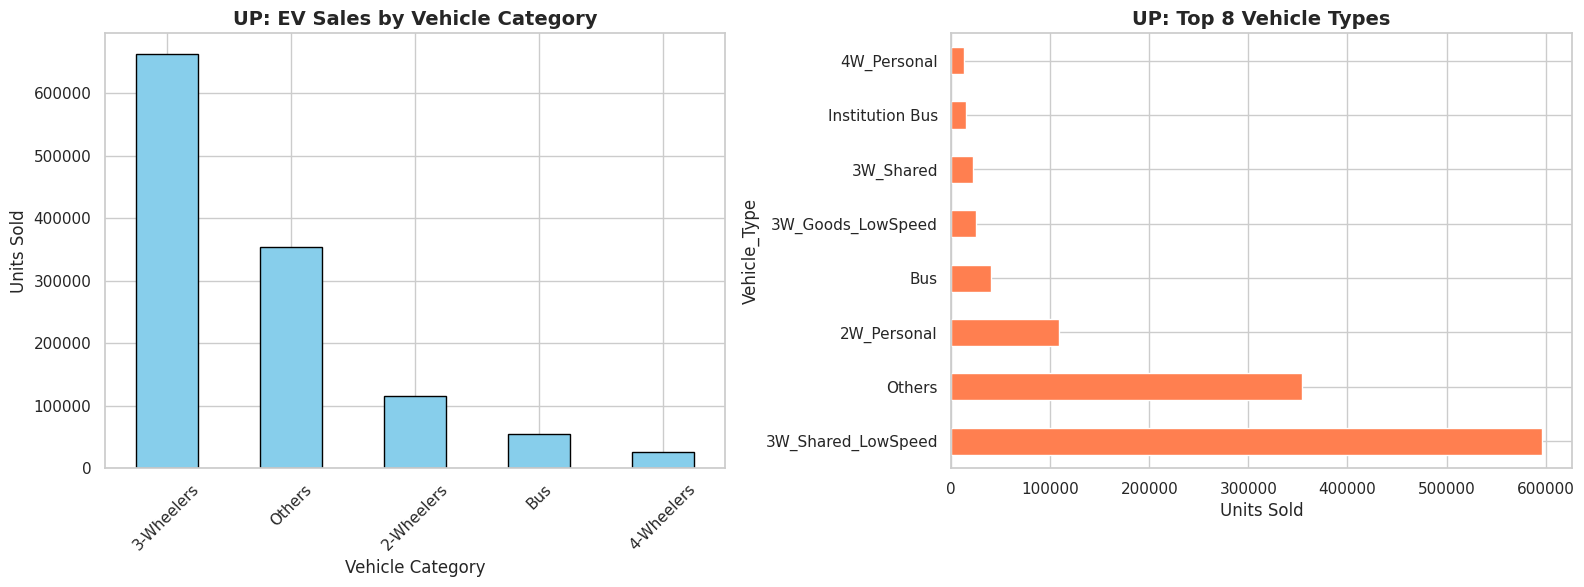

In [28]:
# Filter data for Uttar Pradesh
df_up = df[df['State'] == 'Uttar Pradesh'].copy()

# Calculate total EV sales for UP
total_up_sales = df_up['EV_Sales_Quantity'].sum()

# Calculate total EV sales for all states
total_all_sales = df['EV_Sales_Quantity'].sum()

# Calculate market share for Uttar Pradesh
market_share_up = (total_up_sales / total_all_sales) * 100

# Group by Vehicle_Category to identify dominant segments
category_sales_up = df_up.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Group by Vehicle_Type for detailed breakdown
type_sales_up = df_up.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

print("="*80)
print("UTTAR PRADESH EV MARKET OVERVIEW")
print("="*80)
print(f"Total EV sales in Uttar Pradesh: {total_up_sales:,} units")
print(f"Market share of Uttar Pradesh: {market_share_up:.2f}%")
print("\nTop Vehicle Categories in Uttar Pradesh:")
print(category_sales_up.head())
print("\nTop 5 Vehicle Types in Uttar Pradesh:")
print(type_sales_up.head())

# Visualization: UP Market Breakdown
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Vehicle Category Distribution
category_sales_up.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title("UP: EV Sales by Vehicle Category", fontsize=14, fontweight='bold')
ax1.set_xlabel("Vehicle Category")
ax1.set_ylabel("Units Sold")
ax1.tick_params(axis='x', rotation=45)

# Chart 2: Top Vehicle Types
type_sales_up.head(8).plot(kind='barh', ax=ax2, color='coral')
ax2.set_title("UP: Top 8 Vehicle Types", fontsize=14, fontweight='bold')
ax2.set_xlabel("Units Sold")

plt.tight_layout()
plt.show()

STEP 15: GEOGRAPHIC DIVIDE ANALYSIS
-----------------------------------
Compare E-Rickshaw dominance (UP, Bihar, MP) vs 2-Wheeler preference (MH, KA, TN)
Reference: Geographic-Divide-Analysis PDF

GEOGRAPHIC DIVIDE ANALYSIS

CLUSTER 1 (E-RICKSHAW DOMINANCE):
--------------------------------------------------------------------------------
  Uttar Pradesh: E-Rickshaw share = 51.18%
  Bihar: E-Rickshaw share = 37.77%
  Madhya Pradesh: E-Rickshaw share = 10.72%

CLUSTER 2 (PREMIUM 2-WHEELER PREFERENCE):
--------------------------------------------------------------------------------
  Maharashtra: 2W_Personal share = 40.37%
  Karnataka: 2W_Personal share = 36.16%
  Tamil Nadu: 2W_Personal share = 32.56%


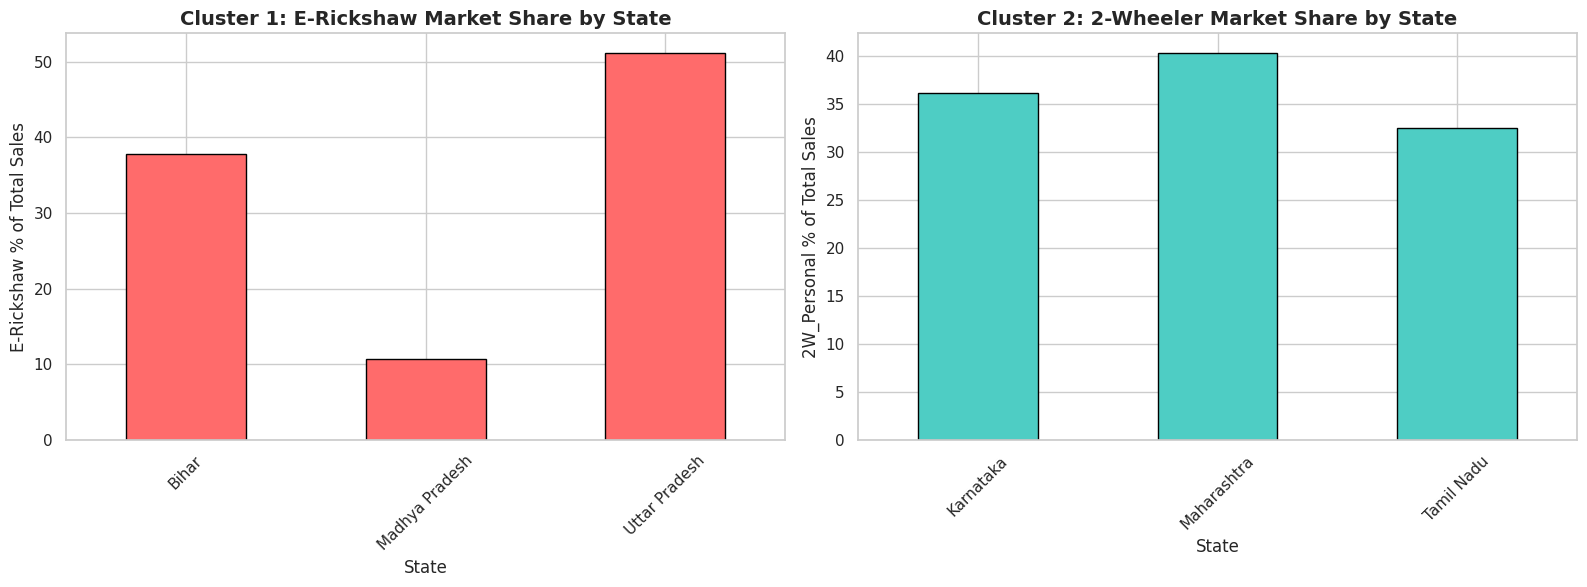

In [29]:
# Define state clusters
cluster1_states = ['Uttar Pradesh', 'Bihar', 'Madhya Pradesh']  # E-Rickshaw dominant
cluster2_states = ['Maharashtra', 'Karnataka', 'Tamil Nadu']     # 2-Wheeler dominant

# Filter data for each cluster
df_cluster1 = df[df['State'].isin(cluster1_states)]
df_cluster2 = df[df['State'].isin(cluster2_states)]

# Cluster 1: Analyze E-Rickshaw sales
erickshaw_classes = ['E-RICKSHAW(P)', 'E-RICKSHAW WITH CART (G)']
cluster1_erickshaw = df_cluster1[df_cluster1['Vehicle_Class'].isin(erickshaw_classes)]
cluster1_erickshaw_sales = cluster1_erickshaw.groupby('State')['EV_Sales_Quantity'].sum()

# Cluster 1: Total sales by state
cluster1_total_sales = df_cluster1.groupby('State')['EV_Sales_Quantity'].sum()

# Calculate E-Rickshaw percentage
cluster1_erickshaw_pct = (cluster1_erickshaw_sales / cluster1_total_sales * 100).round(2)

# Cluster 2: Analyze 2W_Personal sales
cluster2_2w_personal = df_cluster2[df_cluster2['Vehicle_Type'] == '2W_Personal']
cluster2_2w_sales = cluster2_2w_personal.groupby('State')['EV_Sales_Quantity'].sum()

# Cluster 2: Total sales by state
cluster2_total_sales = df_cluster2.groupby('State')['EV_Sales_Quantity'].sum()

# Calculate 2W percentage
cluster2_2w_pct = (cluster2_2w_sales / cluster2_total_sales * 100).round(2)

print("="*80)
print("GEOGRAPHIC DIVIDE ANALYSIS")
print("="*80)
print("\nCLUSTER 1 (E-RICKSHAW DOMINANCE):")
print("-" * 80)
for state in cluster1_states:
    if state in cluster1_erickshaw_pct.index:
        print(f"  {state}: E-Rickshaw share = {cluster1_erickshaw_pct[state]:.2f}%")

print("\nCLUSTER 2 (PREMIUM 2-WHEELER PREFERENCE):")
print("-" * 80)
for state in cluster2_states:
    if state in cluster2_2w_pct.index:
        print(f"  {state}: 2W_Personal share = {cluster2_2w_pct[state]:.2f}%")

# Visualization: Cluster Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cluster 1 visualization
cluster1_erickshaw_pct.plot(kind='bar', ax=axes[0], color='#FF6B6B', edgecolor='black')
axes[0].set_title("Cluster 1: E-Rickshaw Market Share by State", fontsize=14, fontweight='bold')
axes[0].set_ylabel("E-Rickshaw % of Total Sales")
axes[0].set_xlabel("State")
axes[0].tick_params(axis='x', rotation=45)

# Cluster 2 visualization
cluster2_2w_pct.plot(kind='bar', ax=axes[1], color='#4ECDC4', edgecolor='black')
axes[1].set_title("Cluster 2: 2-Wheeler Market Share by State", fontsize=14, fontweight='bold')
axes[1].set_ylabel("2W_Personal % of Total Sales")
axes[1].set_xlabel("State")
axes[1].set_xlabel("State")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

STEP 16: CUSTOMER PERSONA ANALYSIS
----------------------------------
Define distinct customer profiles for Maharashtra, Karnataka, and Bihar

In [30]:
# States for persona analysis
states_of_interest = ['Maharashtra', 'Karnataka', 'Bihar']
df_persona = df[df['State'].isin(states_of_interest)]

# Group by State and Vehicle Category
state_vehicle_sales = df_persona.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()

# Find top vehicle category for each state
top_category_per_state = state_vehicle_sales.loc[
    state_vehicle_sales.groupby('State')['EV_Sales_Quantity'].idxmax()
]

print("="*80)
print("CUSTOMER PERSONA PROFILES")
print("="*80)

# Define personas based on dominant vehicle types
personas = {
    'Maharashtra': {
        'Dominant_Segment': 'Diverse Urban Commuter & Commercial Operator',
        'Top_Categories': '2-Wheelers (Personal), Others (Commercial)',
        'Customer_Type': 'Urban professionals, SME fleet operators',
        'Marketing_Message': '"Experience the future of urban commuting - Smart, Sustainable, Powerful"'
    },
    'Karnataka': {
        'Dominant_Segment': 'Tech-Savvy Early Adopter',
        'Top_Categories': '2-Wheelers (Personal), Premium Features',
        'Customer_Type': 'IT professionals, environmentally conscious buyers',
        'Marketing_Message': '"Drive the future with cutting-edge EV technology"'
    },
    'Bihar': {
        'Dominant_Segment': 'Shared Mobility & Commercial Utility Seeker',
        'Top_Categories': '3-Wheelers (E-Rickshaw), Low-Speed Shared',
        'Customer_Type': 'Gig economy workers, E-rickshaw operators',
        'Marketing_Message': '"Maximize earnings with reliable, cost-effective E-Rickshaws"'
    }
}

for state, persona in personas.items():
    print(f"\n{state.upper()}:")
    print(f"  Segment: {persona['Dominant_Segment']}")
    print(f"  Top Categories: {persona['Top_Categories']}")
    print(f"  Customer Type: {persona['Customer_Type']}")
    print(f"  Marketing: {persona['Marketing_Message']}")

CUSTOMER PERSONA PROFILES

MAHARASHTRA:
  Segment: Diverse Urban Commuter & Commercial Operator
  Top Categories: 2-Wheelers (Personal), Others (Commercial)
  Customer Type: Urban professionals, SME fleet operators
  Marketing: "Experience the future of urban commuting - Smart, Sustainable, Powerful"

KARNATAKA:
  Segment: Tech-Savvy Early Adopter
  Top Categories: 2-Wheelers (Personal), Premium Features
  Customer Type: IT professionals, environmentally conscious buyers
  Marketing: "Drive the future with cutting-edge EV technology"

BIHAR:
  Segment: Shared Mobility & Commercial Utility Seeker
  Top Categories: 3-Wheelers (E-Rickshaw), Low-Speed Shared
  Customer Type: Gig economy workers, E-rickshaw operators
  Marketing: "Maximize earnings with reliable, cost-effective E-Rickshaws"


STEP 17: COMPARATIVE VISUALIZATION
----------------------------------
Create column chart comparing Maharashtra, Karnataka, and Bihar

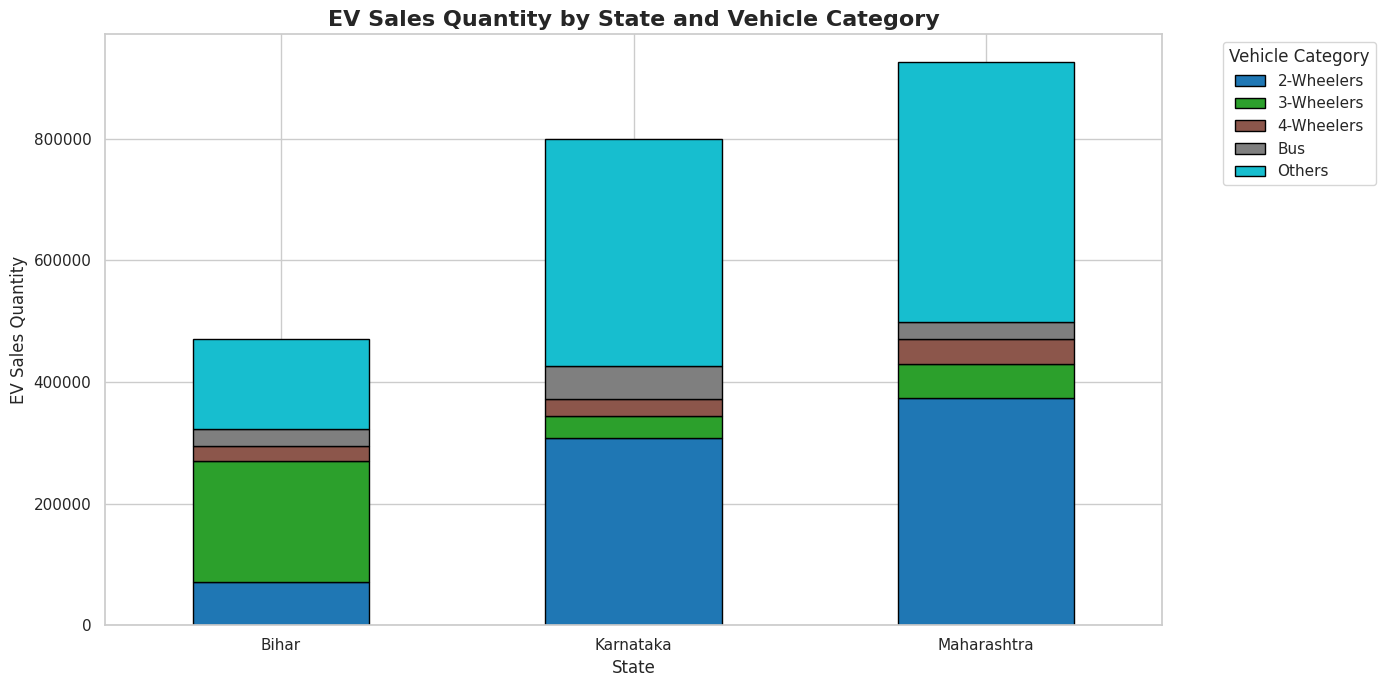


Key Insights:
- Maharashtra: Highest overall sales, dominated by 'Others' and '2-Wheelers'
- Karnataka: Strong in 'Others' and '2-Wheelers', tech-driven adoption
- Bihar: Heavy concentration in '3-Wheelers' (E-Rickshaws)


In [32]:
# Filter for the three states
comparison_states = ['Maharashtra', 'Karnataka', 'Bihar']
df_comparison = df[df['State'].isin(comparison_states)]

# Group by State and Vehicle_Category
grouped_sales = df_comparison.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()

# Pivot for stacked bar chart
pivot_sales = grouped_sales.pivot(index='State', columns='Vehicle_Category', values='EV_Sales_Quantity').fillna(0)

# Create stacked bar chart
ax = pivot_sales.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10', edgecolor='black')
ax.set_title("EV Sales Quantity by State and Vehicle Category", fontsize=16, fontweight='bold')
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("EV Sales Quantity", fontsize=12)
ax.legend(title="Vehicle Category", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Maharashtra: Highest overall sales, dominated by 'Others' and '2-Wheelers'")
print("- Karnataka: Strong in 'Others' and '2-Wheelers', tech-driven adoption")
print("- Bihar: Heavy concentration in '3-Wheelers' (E-Rickshaws)")

# STEP 18 :TIME-BASED SEGMENTATION
Identify Early Adopter vs Late Majority markets

States by Growth Trajectory:
Year              2022.0    2023.0  Growth_Rate_%             Growth_Segment
State                                                                       
Uttar Pradesh   203374.0  319899.0          57.30  Moderate Growth (50-100%)
Kerala           78158.0  114530.0          46.54      Steady Growth (0-50%)
Madhya Pradesh   74768.0  108139.0          44.63      Steady Growth (0-50%)
Bihar            78024.0  110562.0          41.70      Steady Growth (0-50%)
Chandigarh       14283.0   19448.0          36.16      Steady Growth (0-50%)
Karnataka       139663.0  189951.0          36.01      Steady Growth (0-50%)
Punjab           38863.0   52349.0          34.70      Steady Growth (0-50%)
Maharashtra     180108.0  237830.0          32.05      Steady Growth (0-50%)
Chhattisgarh     55467.0   71520.0          28.94      Steady Growth (0-50%)
Assam            73880.0   95245.0          28.92      Steady Growth (0-50%)


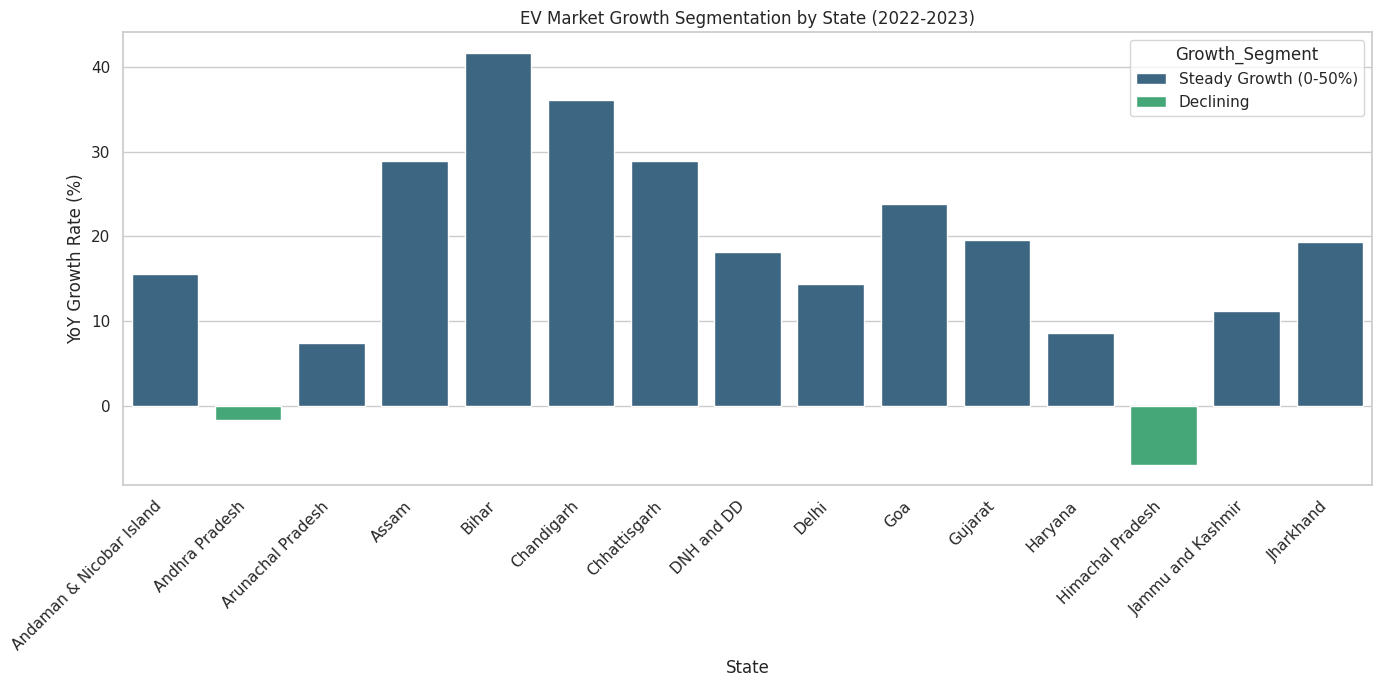

In [33]:
# Calculate Year-over-Year growth rate by state
df_recent = df[df['Year'].isin([2022, 2023])]
growth_analysis = df_recent.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().reset_index()
growth_pivot = growth_analysis.pivot(index='State', columns='Year', values='EV_Sales_Quantity')
growth_pivot['Growth_Rate_%'] = ((growth_pivot[2023] - growth_pivot[2022]) / growth_pivot[2022] * 100).round(2)

# Classify states by growth trajectory
def classify_growth(rate):
    if rate > 100: return "High Growth (>100%)"
    elif rate > 50: return "Moderate Growth (50-100%)"
    elif rate > 0: return "Steady Growth (0-50%)"
    else: return "Declining"

growth_pivot['Growth_Segment'] = growth_pivot['Growth_Rate_%'].apply(classify_growth)

print("States by Growth Trajectory:")
print(growth_pivot.sort_values('Growth_Rate_%', ascending=False).head(10))

# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=growth_pivot.reset_index().head(15), x='State', y='Growth_Rate_%',
            hue='Growth_Segment', palette='viridis', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title("EV Market Growth Segmentation by State (2022-2023)")
plt.ylabel("YoY Growth Rate (%)")
plt.tight_layout()
plt.show()

# STEP 19 : K-MEANS CLUSTERING
Discover hidden patterns using machine learning

K-Means Clustering Results:
             State  Total_Sales  Product_Diversity  Market_Maturity  Cluster  \
31   Uttar Pradesh    1214965.0                 66             10.0        1   
19     Maharashtra     925358.0                 70             10.0        1   
15       Karnataka     799508.0                 70             10.0        1   
27       Rajasthan     722639.0                 62             10.0        1   
10         Gujarat     648085.0                 68             10.0        1   
29      Tamil Nadu     639303.0                 65             10.0        1   
33     West Bengal     545736.0                 60             10.0        1   
16          Kerala     539342.0                 62             10.0        1   
18  Madhya Pradesh     534855.0                 60             10.0        1   
24          Odisha     519699.0                 63             10.0        1   
3            Assam     503837.0                 57             10.0        0   
11         H

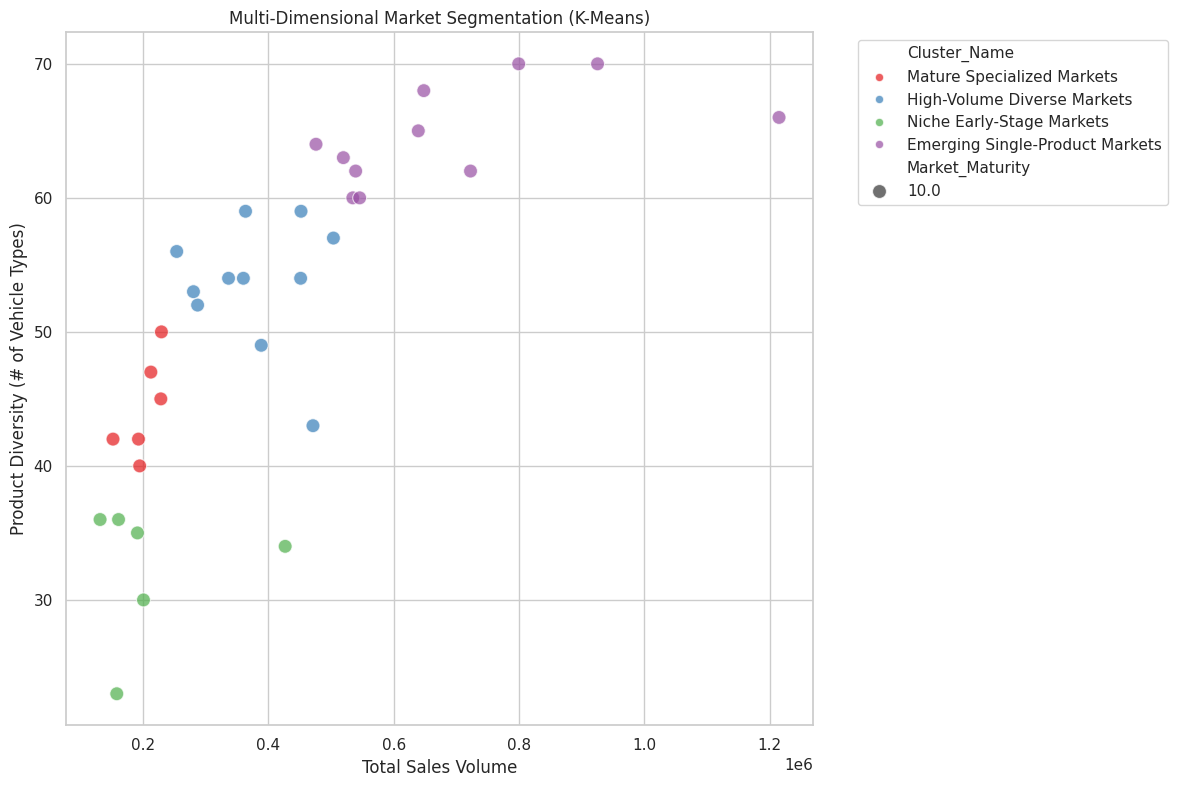

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features for clustering
state_features = df.groupby('State').agg({
    'EV_Sales_Quantity': 'sum',
    'Vehicle_Class': 'nunique',  # Diversity of vehicle types
    'Year': lambda x: x.max() - x.min()  # Years active in market
}).reset_index()

state_features.columns = ['State', 'Total_Sales', 'Product_Diversity', 'Market_Maturity']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(state_features[['Total_Sales', 'Product_Diversity', 'Market_Maturity']])

# Apply K-Means (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
state_features['Cluster'] = kmeans.fit_predict(features_scaled)

# Add cluster labels
cluster_names = {
    0: "High-Volume Diverse Markets",
    1: "Emerging Single-Product Markets",
    2: "Mature Specialized Markets",
    3: "Niche Early-Stage Markets"
}
state_features['Cluster_Name'] = state_features['Cluster'].map(cluster_names)

print("K-Means Clustering Results:")
print(state_features.sort_values('Total_Sales', ascending=False).head(15))

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=state_features, x='Total_Sales', y='Product_Diversity',
                hue='Cluster_Name', size='Market_Maturity', sizes=(100, 1000),
                palette='Set1', alpha=0.7)
plt.title("Multi-Dimensional Market Segmentation (K-Means)")
plt.xlabel("Total Sales Volume")
plt.ylabel("Product Diversity (# of Vehicle Types)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# STEP 20:PRICE SENSITIVITY SEGMENTATION
Identify premium vs budget-conscious markets

In [36]:
# Define price categories (based on typical EV prices)
price_mapping = {
    '2W_Personal': 'Mid-Range (₹1L-₹2L)',
    '3W_Shared_LowSpeed': 'Budget (<₹1L)',
    '4W_Personal': 'Premium (>₹5L)',
    '3W_Shared': 'Mid-Range (₹1L-₹2L)',
    '2W_Commercial': 'Budget (<₹1L)'
}

df['Price_Segment'] = df['Vehicle_Type'].map(price_mapping).fillna('Other')

# Calculate price preference by state
price_pref = df.groupby(['State', 'Price_Segment'])['EV_Sales_Quantity'].sum().reset_index()
price_pivot = price_pref.pivot(index='State', columns='Price_Segment', values='EV_Sales_Quantity').fillna(0)

# Calculate premium ratio
price_pivot['Premium_Ratio'] = (price_pivot.get('Premium (>₹5L)', 0) /
                                  price_pivot.sum(axis=1) * 100).round(2)

# Classify states
def classify_price_sensitivity(ratio):
    if ratio > 10: return "Premium Market"
    elif ratio > 3: return "Mixed Market"
    else: return "Budget Market"

price_pivot['Market_Type'] = price_pivot['Premium_Ratio'].apply(classify_price_sensitivity)

print("Price Sensitivity Segmentation:")
print(price_pivot[['Premium_Ratio', 'Market_Type']].sort_values('Premium_Ratio', ascending=False).head(10))

Price Sensitivity Segmentation:
Price_Segment             Premium_Ratio     Market_Type
State                                                  
Sikkim                            10.46  Premium Market
Ladakh                            10.22  Premium Market
Andaman & Nicobar Island           8.39    Mixed Market
Mizoram                            8.28    Mixed Market
Nagaland                           7.64    Mixed Market
Manipur                            7.14    Mixed Market
Tripura                            7.09    Mixed Market
Meghalaya                          6.23    Mixed Market
Chandigarh                         5.97    Mixed Market
Puducherry                         5.20    Mixed Market


#STEP 21: SEASONAL SEGMENTATION
Identify seasonal demand patterns for inventory planning

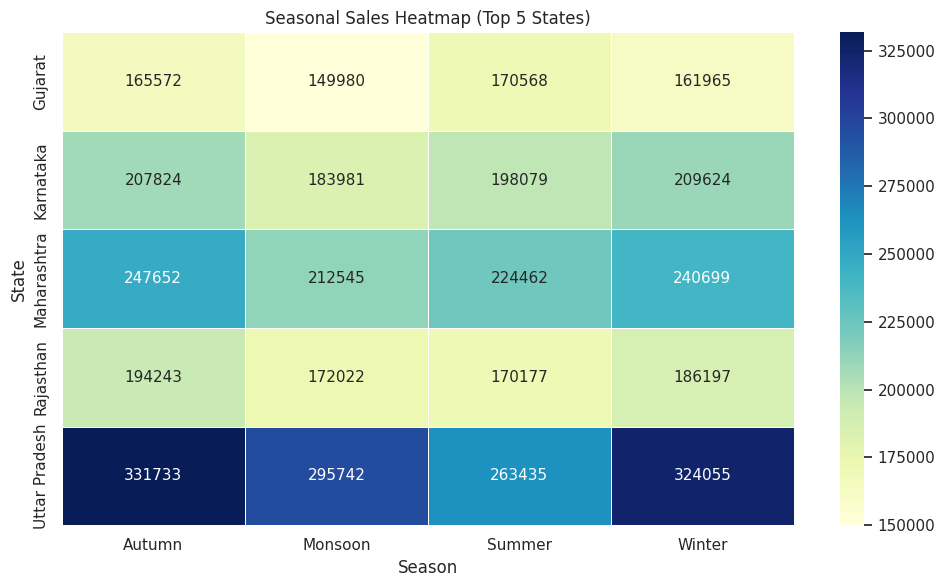

In [37]:
# Add season classification
def get_season(month):
    if month in ['jan', 'feb', 'dec']: return 'Winter'
    elif month in ['mar', 'apr', 'may']: return 'Summer'
    elif month in ['jun', 'jul', 'aug']: return 'Monsoon'
    else: return 'Autumn'

df['Season'] = df['Month_Name'].apply(get_season)

# Seasonal sales by top 5 states
top5_states = df.groupby('State')['EV_Sales_Quantity'].sum().nlargest(5).index
df_seasonal = df[df['State'].isin(top5_states)]

seasonal_pattern = df_seasonal.groupby(['State', 'Season'])['EV_Sales_Quantity'].sum().reset_index()
seasonal_pivot = seasonal_pattern.pivot(index='State', columns='Season', values='EV_Sales_Quantity')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title("Seasonal Sales Heatmap (Top 5 States)")
plt.ylabel("State")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

# Step 22: COMPETITIVE INTENSITY ANALYSIS
Measure market saturation using HHI (Herfindahl-Hirschman Index)

In [38]:
# Calculate market concentration per state (vehicle class diversity)
state_vehicle_sales = df.groupby(['State', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()

# Calculate HHI for each state
def calculate_hhi(state_data):
    total = state_data['EV_Sales_Quantity'].sum()
    market_shares = (state_data['EV_Sales_Quantity'] / total) ** 2
    return market_shares.sum() * 10000  # Scale to 0-10000

hhi_scores = state_vehicle_sales.groupby('State').apply(calculate_hhi).reset_index()
hhi_scores.columns = ['State', 'HHI_Score']

# Classify markets
def classify_competition(hhi):
    if hhi > 2500: return "Highly Concentrated (Low Competition)"
    elif hhi > 1500: return "Moderately Concentrated"
    else: return "Competitive Market"

hhi_scores['Market_Competition'] = hhi_scores['HHI_Score'].apply(classify_competition)

print("Market Competition Analysis:")
print(hhi_scores.sort_values('HHI_Score', ascending=False).head(10))

Market Competition Analysis:
                       State    HHI_Score  \
31             Uttar Pradesh  2500.589846   
4                      Bihar  1564.500259   
8                      Delhi  1548.851785   
19               Maharashtra  1366.373480   
15                 Karnataka  1121.861079   
3                      Assam   923.432802   
29                Tamil Nadu   796.751970   
28                    Sikkim   786.614037   
17                    Ladakh   781.059040   
0   Andaman & Nicobar Island   720.825743   

                       Market_Competition  
31  Highly Concentrated (Low Competition)  
4                 Moderately Concentrated  
8                 Moderately Concentrated  
19                     Competitive Market  
15                     Competitive Market  
3                      Competitive Market  
29                     Competitive Market  
28                     Competitive Market  
17                     Competitive Market  
0                      Competitive 

/tmp/ipython-input-2465358781.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hhi_scores = state_vehicle_sales.groupby('State').apply(calculate_hhi).reset_index()


# STEP 23: PREDICTIVE SEGMENTATION
Forecast future market potential using linear regression

Predicted EV Sales (2024-2026):
                 2024    2025    2026
Uttar Pradesh  173249  185809  198369
Maharashtra    124113  132111  140109
Karnataka      102714  108721  114727
Bihar           62715   66690   70665
Delhi           49873   52087   54301


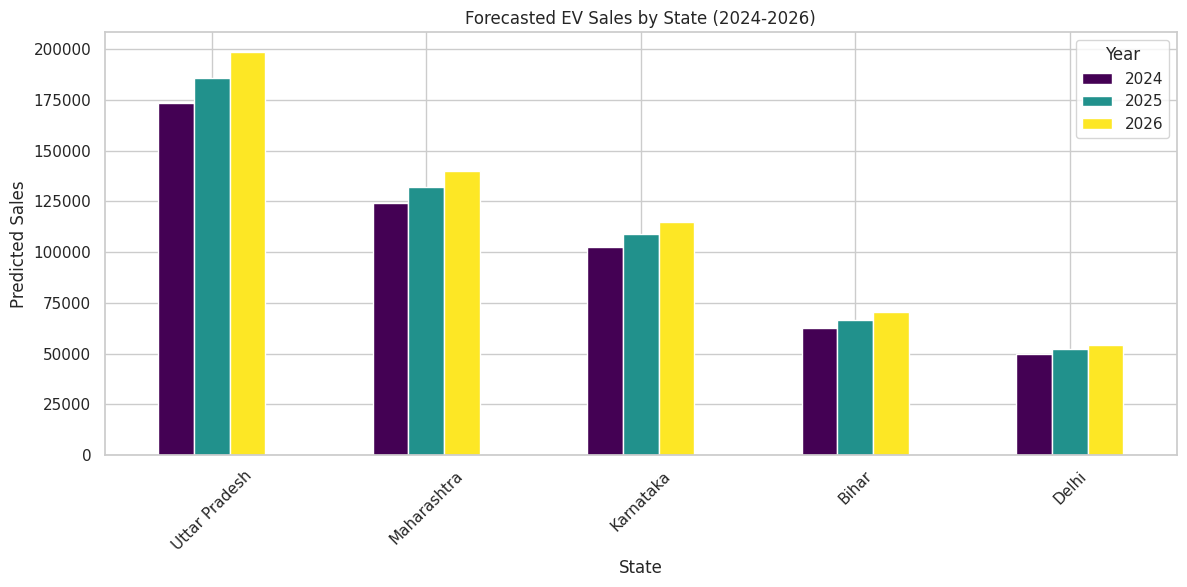

In [39]:
from sklearn.linear_model import LinearRegression

# Prepare time-series data for forecasting
forecast_states = ['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Bihar', 'Delhi']
predictions = {}

for state in forecast_states:
    state_data = df[df['State'] == state].groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['EV_Sales_Quantity'].values

    model = LinearRegression()
    model.fit(X, y)

    # Predict for 2024, 2025, 2026
    future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
    future_sales = model.predict(future_years)

    predictions[state] = {
        '2024': int(future_sales[0]),
        '2025': int(future_sales[1]),
        '2026': int(future_sales[2])
    }

# Display predictions
forecast_df = pd.DataFrame(predictions).T
print("Predicted EV Sales (2024-2026):")
print(forecast_df)

# Visualization
forecast_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Forecasted EV Sales by State (2024-2026)")
plt.ylabel("Predicted Sales")
plt.xlabel("State")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GEOGRAPHIC VISUALIZATION 1: INTERACTIVE INDIA MAP
-------------------------------------------------
 an interactive choropleth map showing EV sales by state

In [40]:
import plotly.express as px
import pandas as pd

# Prepare state-wise sales data
state_sales_map = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
state_sales_map.columns = ['State', 'Total_Sales']

# Calculate market share
state_sales_map['Market_Share_%'] = (
    state_sales_map['Total_Sales'] / state_sales_map['Total_Sales'].sum() * 100
).round(2)

# Standardize state names to match GeoJSON (important!)
state_name_mapping = {
    'Andaman & Nicobar': 'Andaman and Nicobar',
    'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli and Daman and Diu',
    'NCT OF Delhi': 'Delhi',
    'Jammu and Kashmir': 'Jammu and Kashmir',
    # Add more mappings if needed
}
state_sales_map['State'] = state_sales_map['State'].replace(state_name_mapping)

# Create choropleth map
fig = px.choropleth(
    state_sales_map,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',  # Key in GeoJSON
    locations='State',                 # Column in your dataframe
    color='Total_Sales',               # Color based on sales
    color_continuous_scale='Reds',     # Color scheme
    hover_name='State',
    hover_data={
        'Total_Sales': ':,',
        'Market_Share_%': ':.2f'
    },
    title='<b>EV Sales Distribution Across India</b>',
    labels={'Total_Sales': 'Total EV Sales'}
)

# Update map layout
fig.update_geos(
    visible=False,
    projection_type="mercator",
    showcountries=True, countrycolor="Black",
    showcoastlines=True, coastlinecolor="RebeccaPurple"
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        lonaxis_range=[68, 98],  # India's longitude range
        lataxis_range=[6, 38],    # India's latitude range
        projection_scale=4.5
    ),
    height=700,
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

# Save as interactive HTML
fig.write_html('india_ev_sales_map.html')
print("✅ Interactive map saved as 'india_ev_sales_map.html'")

✅ Interactive map saved as 'india_ev_sales_map.html'


# GEOGRAPHIC VISUALIZATION 2: TIER-BASED INDIA MAP
-------------------------------------------------
Color-code states by strategic tier (Leader/Emerging/Growth)

In [41]:
import plotly.express as px

# Add tier classification
def classify_tier(share):
    if share >= 10: return 'Tier 1: Leader'
    elif share >= 4: return 'Tier 2: Emerging'
    else: return 'Tier 3: Growth'

state_sales_map['Tier'] = state_sales_map['Market_Share_%'].apply(classify_tier)

# Define color scheme for tiers
color_discrete_map = {
    'Tier 1: Leader': '#D32F2F',      # Dark Red
    'Tier 2: Emerging': '#FFA726',    # Orange
    'Tier 3: Growth': '#66BB6A'       # Green
}

# Create tier-based map
fig = px.choropleth(
    state_sales_map,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Tier',
    color_discrete_map=color_discrete_map,
    hover_name='State',
    hover_data={
        'Total_Sales': ':,',
        'Market_Share_%': ':.2f',
        'Tier': True
    },
    title='<b>EV Market Segmentation: Strategic Tiers Across India</b>',
)

fig.update_geos(
    visible=False,
    projection_type="mercator"
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        lonaxis_range=[68, 98],
        lataxis_range=[6, 38],
        projection_scale=4.5
    ),
    height=700,
    legend=dict(
        title="Market Tier",
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=0.01
    )
)

fig.show()
fig.write_html('india_market_tiers_map.html')
print("✅ Tier map saved as 'india_market_tiers_map.html'")

✅ Tier map saved as 'india_market_tiers_map.html'


# GEOGRAPHIC VISUALIZATION 3: ANIMATED TIME-LAPSE MAP
----------------------------------------------------
Show how EV sales evolved from 2014 to 2023

In [43]:
import plotly.express as px

# Prepare yearly data by state
yearly_state_sales = df.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().reset_index()
yearly_state_sales.columns = ['Year', 'State', 'Total_Sales']

# Filter for years with significant data (e.g., 2018 onwards)
yearly_state_sales = yearly_state_sales[yearly_state_sales['Year'] >= 2014]

# Standardize state names
yearly_state_sales['State'] = yearly_state_sales['State'].replace(state_name_mapping)

# Create animated choropleth
fig = px.choropleth(
    yearly_state_sales,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Total_Sales',
    animation_frame='Year',           # This creates the animation!
    color_continuous_scale='Plasma',
    range_color=[0, yearly_state_sales['Total_Sales'].max()],
    hover_name='State',
    hover_data={'Total_Sales': ':,'},
    title='<b>Evolution of EV Sales Across India (2018-2023)</b>',
    labels={'Total_Sales': 'EV Sales'}
)

fig.update_geos(
    visible=False,
    projection_type="mercator"
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        lonaxis_range=[68, 98],
        lataxis_range=[6, 38],
        projection_scale=4.5
    ),
    height=700
)

fig.show()
fig.write_html('india_animated_map.html')
print("✅ Animated map saved as 'india_animated_map.html'")
print("   Click ▶ Play button to see market evolution!")

✅ Animated map saved as 'india_animated_map.html'
   Click ▶ Play button to see market evolution!


GEOGRAPHIC VISUALIZATION 4: PRODUCT-MARKET FIT MAP
---------------------------------------------------
Show which vehicle types dominate in each state

In [44]:
import plotly.express as px

# Calculate dominant vehicle category per state
state_vehicle_dominant = df.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
dominant_category = state_vehicle_dominant.loc[
    state_vehicle_dominant.groupby('State')['EV_Sales_Quantity'].idxmax()
]
dominant_category = dominant_category[['State', 'Vehicle_Category', 'EV_Sales_Quantity']]
dominant_category.columns = ['State', 'Dominant_Vehicle', 'Sales']

# Standardize
dominant_category['State'] = dominant_category['State'].replace(state_name_mapping)

# Color mapping for vehicle categories
vehicle_colors = {
    '2-Wheelers': '#2196F3',    # Blue
    '3-Wheelers': '#FF9800',    # Orange
    '4-Wheelers': '#4CAF50',    # Green
    'Bus': '#9C27B0',           # Purple
    'Others': '#757575'         # Gray
}

# Create map
fig = px.choropleth(
    dominant_category,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Dominant_Vehicle',
    color_discrete_map=vehicle_colors,
    hover_name='State',
    hover_data={'Sales': ':,', 'Dominant_Vehicle': True},
    title='<b>Product-Market Fit: Dominant Vehicle Type by State</b>',
)

fig.update_geos(
    visible=False,
    projection_type="mercator"
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        lonaxis_range=[68, 98],
        lataxis_range=[6, 38],
        projection_scale=4.5
    ),
    height=700,
    legend=dict(title="Dominant<br>Vehicle Type")
)

fig.show()
fig.write_html('india_product_map.html')
print("✅ Product-market fit map saved as 'india_product_map.html'")

✅ Product-market fit map saved as 'india_product_map.html'
